In [73]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [101]:
df = pd.read_excel ('MktRet_DP_TermSpread.xlsx')
del df['Date_original']
print(df)
#a = df.drop(Date_original)
#df.head(10)


          Date  MktExRet    Mkt_DP  y10minFedFunds
0   1957-03-31 -0.034466  0.041524          0.0048
1   1957-06-30  0.069989  0.039292          0.0094
2   1957-09-30 -0.104231  0.044457          0.0047
3   1957-12-31 -0.060972  0.047091          0.0037
4   1958-03-31  0.064963  0.044492          0.0162
..         ...       ...       ...             ...
231 2014-12-31  0.040283  0.019934          0.0177
232 2015-03-31  0.016266  0.020330          0.0182
233 2015-06-30 -0.000171  0.020765          0.0219
234 2015-09-30 -0.081092  0.023032          0.0195
235 2015-12-31  0.053783  0.022266          0.0175

[236 rows x 4 columns]
0     1957-03-31
1     1957-06-30
2     1957-09-30
3     1957-12-31
4     1958-03-31
         ...    
231   2014-12-31
232   2015-03-31
233   2015-06-30
234   2015-09-30
235   2015-12-31
Name: Date, Length: 236, dtype: datetime64[ns]


In [54]:
#-------------Question 1-------------#

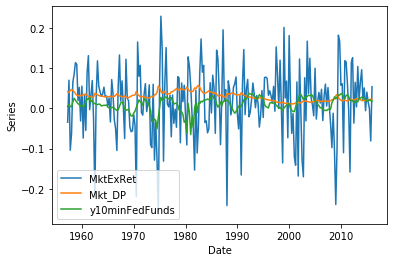

In [85]:
# plot

fig,ax=plt.subplots()
ax.plot(df.Date, df.MktExRet, label = "MktExRet")
ax.plot(df.Date, df.Mkt_DP, label = "Mkt_DP")
ax.plot(df.Date, df.y10minFedFunds, label = "y10minFedFunds")
ax.set_xlabel("Date")
ax.set_ylabel("Series")

plt.legend()
plt.show()   

In [86]:
# Calculate autocorrelation
mktexret_ac1 = pd.Series(df.MktExRet)
mktexret_ac1 = mktexret_ac1.autocorr(lag=1)

Mkt_DP_ac1 = pd.Series(df.Mkt_DP)
Mkt_DP_ac1 = Mkt_DP_ac1.autocorr(lag=1)

y10minFedFunds_ac1 = pd.Series(df.y10minFedFunds)
y10minFedFunds_ac1 = y10minFedFunds_ac1.autocorr(lag=1)

# Calculate sample mean
mktexret_mean = np.mean(df.MktExRet)
Mkt_DP_mean = np.mean(df.Mkt_DP)
y10minFedFunds_mean = np.mean(df.y10minFedFunds)

# Calculate sample mean
mktexret_std = np.std(df.MktExRet)
Mkt_DP_std = np.std(df.Mkt_DP)
y10minFedFunds_std = np.std(df.y10minFedFunds)

# Calculate half life
mktexret_halflife = np.log(0.5)/np.log(mktexret_ac1)
Mkt_DP_halflife = np.log(0.5)/np.log(Mkt_DP_ac1)
y10minFedFunds_halflife = np.log(0.5)/np.log(y10minFedFunds_ac1)



In [87]:
pip install PTable

Note: you may need to restart the kernel to use updated packages.


In [88]:
from prettytable import PrettyTable

In [89]:
x = PrettyTable()

x.field_names = ["","MktExRet", "Mkt_DP", "y10minFedFunds"]

x.add_row(["Sample Mean", mktexret_ac1, Mkt_DP_ac1, y10minFedFunds_ac1])
x.add_row(["Standard Deviation", mktexret_std, Mkt_DP_std, y10minFedFunds_std])
x.add_row(["First Order Autocorrelation", mktexret_ac1, Mkt_DP_ac1, y10minFedFunds_ac1])
x.add_row(["Half Life", mktexret_halflife, Mkt_DP_halflife, y10minFedFunds_halflife])

print(x)

+-----------------------------+---------------------+---------------------+----------------------+
|                             |       MktExRet      |        Mkt_DP       |    y10minFedFunds    |
+-----------------------------+---------------------+---------------------+----------------------+
|         Sample Mean         | 0.06969560982859942 |  0.961906405216185  |  0.8039330082467782  |
|      Standard Deviation     | 0.08417095397119832 | 0.01031682755436074 | 0.016986921118425098 |
| First Order Autocorrelation | 0.06969560982859942 |  0.961906405216185  |  0.8039330082467782  |
|          Half Life          | 0.26022770292265734 |  17.847081492851444 |  3.1760872817424963  |
+-----------------------------+---------------------+---------------------+----------------------+


In [ ]:
#-------------Question 2-------------#

In [ ]:
df1 = pd.read_excel ('MktRet_DP_TermSpread.xlsx', index_col = 0)
del df1['Date_original']
print(df1)
#a = df.drop(Date_original)
#df.head(10)
#print(df.Date)



In [109]:
X = sm.add_constant(df[["MktExRet", "Mkt_DP", "y10minFedFunds"]])
df["rtn_shift1"]=df["MktExRet"].shift(-1)
model1 = sm.OLS(df["rtn_shift1"], X,missing='drop')
results1 = model1.fit()
print(results1.summary())
robust_test1=results1.get_robustcov_results('HC1')
print(robust_test1.summary())

                            OLS Regression Results                            
Dep. Variable:             rtn_shift1   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.977
Date:                Thu, 04 Feb 2021   Prob (F-statistic):            0.00230
Time:                        13:22:54   Log-Likelihood:                 255.19
No. Observations:                 235   AIC:                            -502.4
Df Residuals:                     231   BIC:                            -488.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0383      0.018     -2.

In [110]:
df["DP_shift1"]=df["Mkt_DP"].shift(-1)
model2 = sm.OLS(df["DP_shift1"], X,missing='drop')
results2 = model2.fit()
print(results2.summary())
robust_test1=results2.get_robustcov_results('HC1')
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              DP_shift1   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1021.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):          6.13e-133
Time:                        13:44:54   Log-Likelihood:                 1053.8
No. Observations:                 235   AIC:                            -2100.
Df Residuals:                     231   BIC:                            -2086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0021      0.001      3.

In [111]:
df["FFspread_shift1"]=df["y10minFedFunds"].shift(-1)
model3 = sm.OLS(df["FFspread_shift1"], X,missing='drop')
results3 = model3.fit()
print(results3.summary())
robust_test1=results3.get_robustcov_results('HC1')
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:        FFspread_shift1   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     144.0
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           1.28e-52
Time:                        13:47:57   Log-Likelihood:                 747.69
No. Observations:                 235   AIC:                            -1487.
Df Residuals:                     231   BIC:                            -1474.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.002      0.

In [104]:
#returns = np.log(df1).diff().dropna()
#model = VAR(returns)

C:\Users\bridg\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\bridg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [116]:
y = PrettyTable()

y.field_names = ["","Intercept", "White standard errors", "R squared"]

y.add_row(["MktExRet", -0.0383, "--", 0.061])
y.add_row(["Mkt_DP", 0.0021, "--", 0.930])
y.add_row(["y10minFedFunds", 0.0019, "--", 0.652])


print(y)

+----------------+-----------+-----------------------+-----------+
|                | Intercept | White standard errors | R squared |
+----------------+-----------+-----------------------+-----------+
|    MktExRet    |  -0.0383  |           --          |   0.061   |
|     Mkt_DP     |   0.0021  |           --          |    0.93   |
| y10minFedFunds |   0.0019  |           --          |   0.652   |
+----------------+-----------+-----------------------+-----------+


In [ ]:
#-------------Question 3-------------#

In [ ]:
#-------------Question 4-------------#

In [106]:
print('We know the VAR is stationary if the absolute value of the roots are less than one, and we can see in the table above in question 1 that first order autocorrelation is less than one for all variables.')


We know the VAR is stationary if the absolute value of the roots are less than one, and we can see in the table above in question 1 that First Order Autocorrelation is less than one for all variables.
